## Задачи
1. Загрузить два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций?
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста совершили наибольшее количество успешных действий?
      
## Описание данных
**user_data:**

* client – идентификатор пользователя

* premium – является ли клиент премиум

* age – возраст

**logs:**

* client – идентификатор пользователя

* success – результат (успех - 1, нет - 0)

* platform – платформа

* time – время в формате Unix

## Загрузить два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [12]:
user_data = pd.read_csv('C:/Users/majkl/WorkSpace/Project2/3_user_data.csv')
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [18]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [52]:
duplicates = user_data[user_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [client, premium, age]
Index: []


In [56]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [46]:
logs = pd.read_csv('C:/Users/majkl/WorkSpace/Project2/3_logs.csv')
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [29]:
logs.head()


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [39]:
duplicates = logs[logs.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [client, success, platform, time]
Index: []


In [54]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


## Какой клиент совершил больше всего успешных операций?

In [81]:

df_logs = logs.query('success == True') \
    .groupby('client') \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending = False)
df_logs

,success
client,
12179,41
61468,41
52870,41
61473,41
92584,41
...,...
34121,1
34191,1
34198,1


In [91]:
max = df_logs.max()
max

success    41
dtype: int64

In [105]:
max_users = df_logs.query('success == 41')
max_users

,success
client,
12179,41
61468,41
52870,41
61473,41
92584,41
82563,41
78349,41
36165,41
28719,41


In [107]:
max_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

## С какой платформы осуществляется наибольшее количество успешных операций?

In [109]:
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

## Какую платформу предпочитают премиумные клиенты?

In [115]:
premium_users = user_data.merge(logs, on='client' )
premium_users

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [183]:

print(f'Премиум клиенты предпочитают платформу: {premium_users.loc[premium_users.premium == True].platform.value_counts().idxmax()}')

Премиум клиенты предпочитают платформу: phone


 ## Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

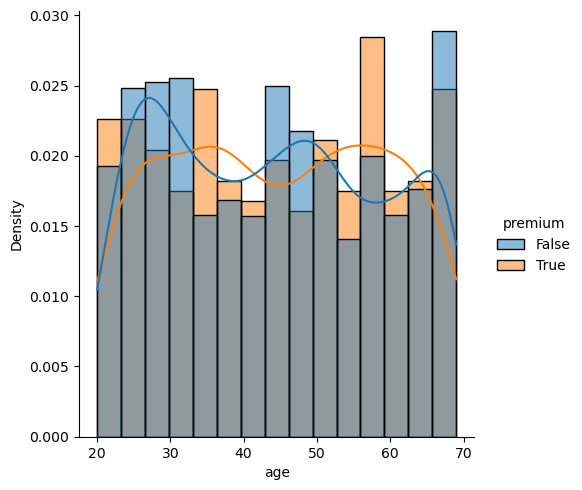

In [151]:
sns.displot(data=premium_users, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            )
sns.despine()

## Постройте график распределения числа успешных операций

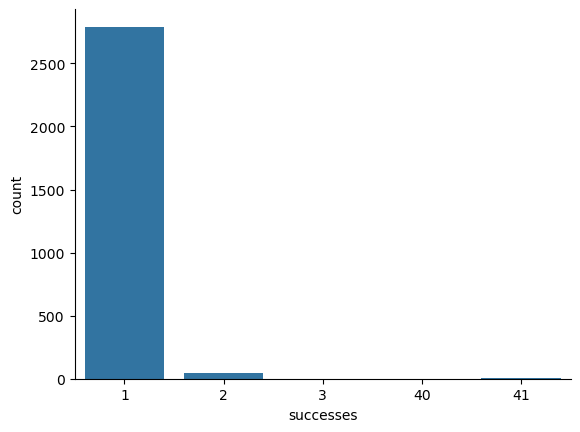

In [161]:
success_count = logs.loc[logs.success == True].client.value_counts()
success_count = success_count.rename('successes')


sns.countplot(x=success_count)
sns.despine()

## Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста совершили наибольшее количество успешных действий?


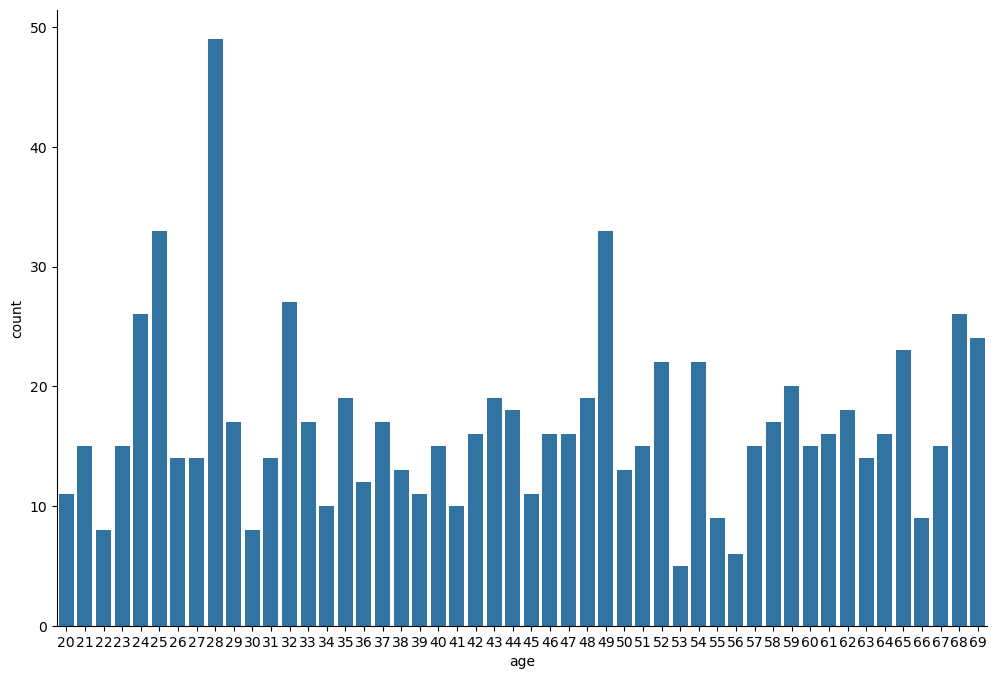

In [176]:
plt.figure(figsize=(12,8))
sns.countplot(data=premium_users.loc[(premium_users.platform == 'computer')
                                   & (premium_users.success == True)], 
             x='age')
sns.despine()

Ответ: `28`